# Madrid Train Bombing Network Analytics

FOUR kinds of ties linking the individuals involved:
1.   Trust-friendship (contact, kinship, links in the telephone center).
2.   Ties to Al Qaeda and to Osama Bin Laden.
3.   Co-participation in training camps or wars.
4.   Co-participation in previous terrorist attacks (Sept 11, Casablanca).

These four were added together providing a *“strength of connection”* index
that ranges from 1 to 4. 

### Hint

For instance:
* Flush out the most dangerous terrorists;
  * Explain the concept adopted as “most dangerous”
* Detect the most cohesive groups of terrorists;
  * Detect the most influencial terrorist within each group


- Try also **edge_betweenness**


### Import packages and data


In [3]:
# Networks
import igraph as ig
import louvain

# Computation
import numpy as np
np.random.seed(0)
import scipy
import random
random.seed(0)

# Data
import pandas as pd
import csv

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import sys

import plotly
import plotly.plotly as py

In [4]:
g = ig.Graph.Read_Ncol("data/madrid-edges.dat", names=True)

names = open("data/madrid-names.dat")
lines = names.read().split('\n')

for i in range(len(lines)):
    lines[i] = lines[i].replace('"', '')
    
for i in range(len(g.vs)):
    g.vs[i]["name"] = lines[int(g.vs[i]["name"])-1]
    
g.vs["label"] = g.vs["name"]
    
print(g)

IGRAPH DNW- 64 486 --
+ attr: label (v), name (v), weight (e)
+ edges (vertex names):
           Jamal Zougam -> Mohamed Bekkali, Mohamed Chaoui, Vinay Kholy,
Suresh Kumar, Mohamed Chedadi, Imad Eddin Barakat, Abdelaziz Benyaich, Abu
Abderrahame, Amer Azizi, Abu Musad Alsakaoui, Mohamed Atta, Ramzi Binalshibh,
Mohamed Belfatmi, Said Bahaji, Galeb Kalaje, Abderrahim Zbakh, Naima Oulad
Akcha, Abdelkarim el Mejjati, Basel Ghayoun, S B Abdelmajid Fakhet, Jamal
Ahmidan, Hamid Ahmidan, Abdeluahid Berrak, Said Berrak, Otman El Gnaut, El
Hemir, OM. Othman Abu Qutada, Shakur, Mohamed El Egipcio
        Mohamed Bekkali -> Jamal Zougam, Mohamed Chaoui
         Mohamed Chaoui -> Jamal Zougam, Mohamed Bekkali, Vinay Kholy, Suresh
Kumar, Imad Eddin Barakat, Abdelaziz Benyaich, Abu Abderrahame, Amer Azizi,
Abu Musad Alsakaoui, Mohamed Atta, Ramzi Binalshibh, Mohamed Belfatmi, Said
Bahaji, Galeb Kalaje, Abderrahim Zbakh, Naima Oulad Akcha, Abdelkarim el
Mejjati, Basel Ghayoun, S B Abdelmajid Fakhet, J

### General analysis

In [6]:
n = g.vcount()
m = g.ecount()
print('{0} nodes, {1} edges'.format(n, m))

64 nodes, 486 edges


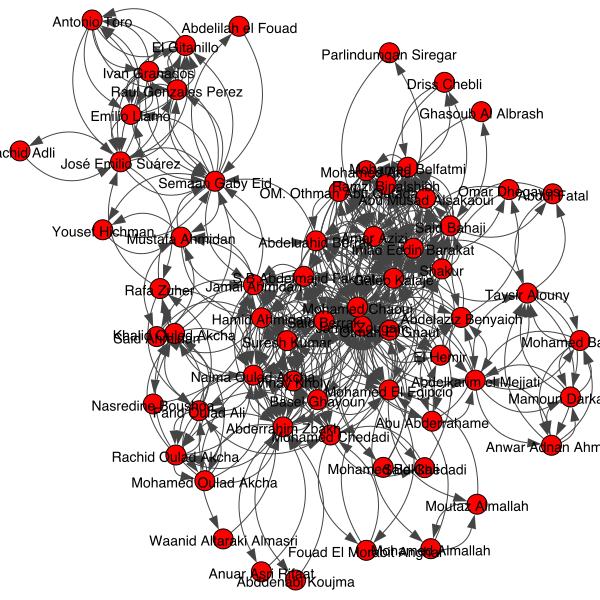

In [7]:
ig.plot(g)

## Centrality Analitycs



In [25]:
def nodes_bound(graph, threshold, measure):
    label = graph.vs["label"]
    measure_list = list()
    nodes = list()
    
    if measure == 'closeness':
        measure_list = graph.closeness()
        np.save('out/closeness.npy', measure_list)
    elif measure == 'betweenness':
        measure_list =  graph.betweenness()
        np.save('out/betweenness.npy', measure_list)
    elif measure == 'pagerank':
        measure_list =  graph.pagerank()
        np.save('out/pagerank.npy', measure_list)
    elif measure == 'degree':
        measure_list =  graph.degree()
        np.save('out/degree.npy', measure_list)
    elif measure == 'eigenvector_centrality':
        measure_list = graph.evcent()
        np.save('out/eigenvector_centrality.npy', measure_list)
    elif measure == 'indegree':
        measure_list = graph.indegree()
        np.save('out/indegree.npy', measure_list)
    elif measure == 'outdegree':
        measure_list = graph.outdegree()
        np.save('out/outdegree.npy', measure_list)
    else:
        print('Function not available.')
    
    for i in range (len(measure_list)):
        if measure_list[i] >= threshold:
            nodes.append((label[i], round(measure_list[i], 2)))
            
    sorted_nodes = sorted(nodes, key = lambda x: float(x[1]))
    
    print('Vertex with the highest ', measure, ':')
    return sorted_nodes

### Shortest path 

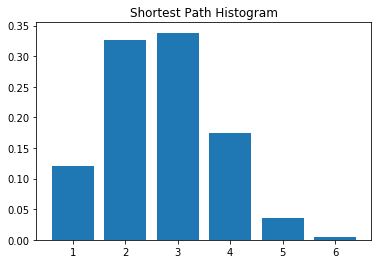

In [26]:
hist = g.path_length_hist(directed=True)

bins = []
values = []

for bin in hist.bins():
    values.append(bin[2])
    bins.append(bin[0])

bins = np.array(bins)
bins = bins.astype(int)
values = np.array(values)

values = values / np.sum(values)

plt.bar(bins, values)
plt.xticks(bins, bins)
plt.title("Shortest Path Histogram")
plt.show()

### Degree centrality

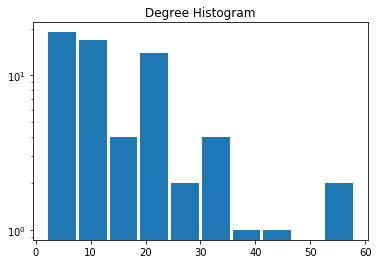

In [27]:
plt.hist(g.degree(), log=True, rwidth=0.9)
plt.title("Degree Histogram")
plt.show()

In [33]:
print(nodes_bound(g, 50, 'degree'))

Vertex with the highest  degree :
[('Mohamed Chaoui', 54), ('Jamal Zougam', 58)]


#### Indegree

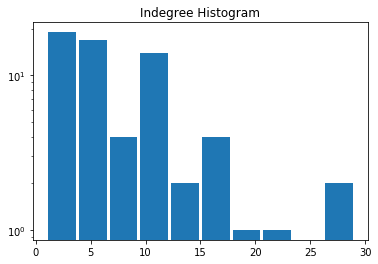

In [34]:
plt.hist(g.indegree(), log=True, rwidth=0.9)
plt.title("Indegree Histogram")
plt.show()

In [35]:
print(nodes_bound(g, 25, 'indegree'))

Vertex with the highest  indegree :
[('Mohamed Chaoui', 27), ('Jamal Zougam', 29)]


#### Outdegree

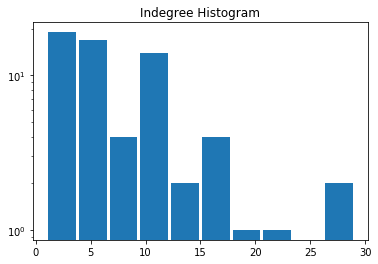

In [36]:
plt.hist(g.indegree(), log=True, rwidth=0.9)
plt.title("Indegree Histogram")
plt.show()

In [37]:
print(nodes_bound(g, 25, 'outdegree'))

Vertex with the highest  outdegree :
[('Mohamed Chaoui', 27), ('Jamal Zougam', 29)]


### Betweenness centrality